---

# Linear Regression With NumPy

---

-- For more information on this code, watch the video lecture(s) --

In this notebook we will explore implimenting a linear regression model using only NumPy.
We will explore three linear regression models: A single variable line, a multivariable hyperplane, and a polynomial.

##### Main Sections:
1. Defining the linear regression model
2. linear regression with single variable
3. linear regression with multiple variables
4. polynomial regression
5. Other Regression Models
6. Conclusion

#### Imports and Setup

In [22]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

<a id='section_1'></a>

---

## 1. Define the Linear Regression Class

---

We will use this same model for single variable, multi-variable, and polynomial regression.

In [23]:
class LinearRegression:
    """
    This class is a linear regression model
      
    Attributes:
        poly (boolean): Indicates if the regression model is a polynimial model or not. This
            is used for generating a formated string representation of the model.
        w (int): The weights/parameters/coefficient of the regression model.
    """
    
    def __init__(self, poly=False):
        self.poly = poly

    
    def fit(self, X, y):
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        
        # Form the system of equations.
        A = V.T@V
        b = V.T@y
        
        # Solve the system of linear equations.
        self.w = np.linalg.solve(A, b)
        
    
    def predict(self, X):
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        return (V@self.w)
    
    
    def __str__(self):
        """Returnes a string representation of the model."""
        
        model_str = 'y = '
        flat_w = self.w.flatten()
        
        for i in range(len(flat_w)):
            if i==0:
                model_str += str(flat_w[i])
            else:
                model_str += ' + ' + str(flat_w[i]) + '*x'
                if self.poly:
                    model_str += '^' + str(i)
                else:
                    model_str += '_' + str(i) 
        
        return model_str

---

## 2. One Dimensional Regression

---

First We will look at fiting a 1D line to some data with a single feature.

###### Minimizing the sum of square errors (SSE):

We aim to find the $w_0$ and  $w_1$ values for the line $\hat{y} = w_0 + w_1x$ so that the sum of all square differences between the actual $y$ value and the predicted $\hat{y}$ value of the line are minimized. To do this we find the derivatives and set to zero.

\begin{equation}
    \begin{split}
        SSE(w_0, w_1) & = \sum_{i=1}^{n}(y_i-\hat{y_i})^2 \\
        & = \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2
    \end{split}
\end{equation}


\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, w_1)}{\partial \; w_0} & = 
         \frac{\partial}{\partial \; w_0} \left[ \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))  \\
    \end{split}
\end{equation}

\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, w_1)}{\partial \; w_1} & = 
         \frac{\partial}{\partial \; w_1} \left[ \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))\cdot x_i  \\
    \end{split}
\end{equation}

Now we set equations the above equation to zero and solve the system for $w_0$ and $w_1$.

We can rewrite this sytem in terms of matrices to simplify the expressions and computations.

\begin{equation}
    \text{Let } \boldsymbol{X} = 
    \begin{bmatrix}
        1 & x_{1} \\
        1 & x_{2} \\
        \vdots & \vdots\\
        1 & x_{m}
    \end{bmatrix}, \ \
    \boldsymbol{y} = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_m
    \end{bmatrix}\text{, and }
    \boldsymbol{w} = 
    \begin{bmatrix}
        w_0 \\
        w_1 \\
    \end{bmatrix}.
\end{equation}

Then the normal equations are then represented by $X^TX\boldsymbol{w} = X^Ty$.
This linear system can now be solved for $\boldsymbol{w}$ by any method of choice.

#### Generate the Dataset

In practice, we would use a real dataset. However, for now we will make up our own simple data to prove the model works.

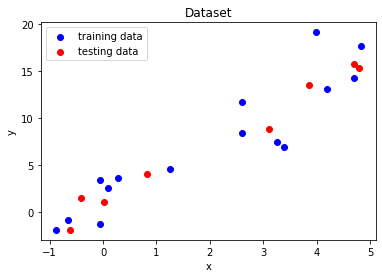

In [24]:
# Example line with some randomness.
def line(x):
    return 3*x + 2 + np.random.normal(0, 2, x.shape)

np.random.seed(42)

# Generate the training dataset.
X_train1 = np.random.uniform(-1, 5, 15)
y_train1 = line(X_train1)

# Generate the testing dataset.
X_test1 = np.random.uniform(-1, 5, 8)
y_test1 = line(X_test1)

# Plot the data.
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.scatter(X_test1, y_test1, c='r', label='testing data')
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Fit a Linear Regression Model to the Training Data

We will now fit/train the model we defined on our made up data.

In [25]:
# Create and fit model.
linreg = LinearRegression()
linreg.fit(X_train1, y_train1)

print('Regression Model:\n', linreg, "\n")
print('Model Parameters:\n', linreg.w)

Regression Model:
 y = 1.3386212887349471 + 3.0085416460432155*x_1 

Model Parameters:
 [1.33862129 3.00854165]


#### Use the Fit Model to Make a Prediction on the Testing Data

Now that our model is trained, let's see it in action!

In [26]:
# Make a prediction with our model.
y_pred1 = linreg.predict(X_test1)

print('Actual Targets: ', np.round(y_test1, 2))
print('Predictions:', np.round(y_pred1, 2))

Actual Targets:  [ 1.04 -1.87 15.76 15.31 13.54  4.02  1.54  8.79]
Predictions: [ 1.41 -0.5  15.46 15.76 12.92  3.83  0.09 10.68]


#### Model visualization

Now that we have fit our model, lets see what it looks like!

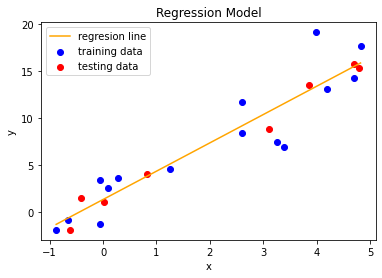

In [27]:
D = np.linspace(np.min(X_train1), np.max(X_train1), 2)
R = linreg.predict(D)

# Plot the model and data.
plt.plot(D, R, label='regresion line', c='orange')
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.scatter(X_test1, y_test1, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.legend()
plt.show()

#### Metrics
It is important to measure the performance of our model. There are many regression metrics one can use, but we will just look at some of the most popular ones. We want to use the testing data to measure the performance of the model. Here $y$ represents `y_test1` and $\hat{y}$ represents `y_pred1` which is the models predictions on `X_test1`.


1. Mean Absolute Error (MAE): The MAE tells us the distance, on average, each point is from the line vertically. The closer MAE is to zero the better the model fits the data.
$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

2. Mean Squared Error (MSE): The MSE tells us what the mean squared distance that each point is from the line. Squaring the error makes MSE much more sensative to outliers than MAE. The closer MSE is to zero the better the model fits the data.
$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

3. Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is also sensitive to outliers. RMSD is an aggragate of magnitued of the distance of each point from the line vertically. The closer RMSE is to zero the better the model fits the data.
$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

4. Coefficent of Determination ($r^2$ value): Proportion of the variation in the data that is explained by the model and is a measure of 'goodness of fit'. It is in $0\leq r^2\leq 1$ where $r^2=0$ indicates the model explains none of the variation in the data and $r^2=1$ indicates the model perfectly explains the variation in the data. So the closer $r^2$ is to 1 the better the model fits the data.
$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)}$$

5. Corelation Coefficent (r value): The r value mesures the corelation between the input features and the output targets. $|r| \leq 1$. If r is near 1, there is strong positive correlation. If r is near -1, there is strong negative correlation.
* $0.7 ＜ |r| \leq 1$ - strong correlation
* $0.4 ＜ |r| ＜ 0.7$ - moderate correlation
* $0.2 ＜ |r| ＜ 0.4$ - weak correlation
* $0 \leq |r| ＜ 0.2$ - no correlation
$$r = \frac{\sum (x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2(y-\bar{y})^2}$$

$$ |r| = \sqrt{r^2} $$

In [28]:
# Define our error and fit metrics.
def mae(y1, y2):
    return np.sum(abs(y1-y2))/len(y1)
           
def mse(y1, y2):
    return np.sum((y1-y2)**2) / len(y1)
                  
def rmse(y1, y2):
    return np.sqrt(mse(y1, y2))
                  
def r2(y1, y2):
    return 1 - np.sum((y1-y2)**2) / np.sum((y1-np.mean(y2))**2)
                  
def r(x, y):
    sst_xx = np.sum((x-np.mean(x))**2)
    sst_yy = np.sum((y-np.mean(y))**2)
    sst_xy = np.sum((x-np.mean(x))*(y-np.mean(y)))
    return sst_xy/(np.sqrt(sst_xx*sst_yy))

In [29]:
# All of the metrics are computed on the testing dataset.
mae_ = mae(y_test1, y_pred1)
mse_ = mse(y_test1, y_pred1)
rmse_ = rmse(y_test1, y_pred1)
r2_ = r2(y_test1, y_pred1)
r_ = r(X_test1, y_test1)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)
print('r: %.3f' % r_)

Mean Absolute Error: 0.830
Mean Squared Error: 1.052
Root Mean Squares Error: 1.026
r2: 0.976
r: 0.988


#### Ploting Confidence Intervals

In practice, we only have a sample of the "true" dataset to fit our model to. We want to use the trained model to make predictions on samples not seen during the fitting stage. This is why we use a testing dataset. We want to see how the model performes on data it has not seen before (i.e. samples it was not trained with). As such, we would like to know the range that the "true" regression line lies within with some level of confidence. For this, we will construct an interval of 95% confidence for each learned parameter, $w_0$ and $w_1$, of the model.

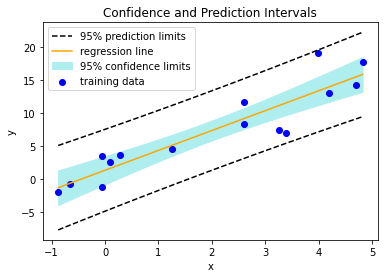

In [30]:
domain = np.linspace(np.min(X_train1), np.max(X_train1)) 
range_ = linreg.predict(domain)

residules = y_train1-linreg.predict(X_train1)

degfredom = len(X_train1)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical value from Students' t distribution

pred_int = t_crit*s_err*np.sqrt(1 + 1/len(X_train1) + (domain - np.mean(X_train1))**2 
                                    / np.sum((X_train1 - np.mean(X_train1))**2))
conf_int = t_crit*s_err*np.sqrt(1/len(X_train1) + (domain - np.mean(X_train1))**2 
                                    / np.sum((X_train1 - np.mean(X_train1))**2))

# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()

---

## 3. Multiple Regression

---

Now we will look fiting a linear regression model to some data with more than a single feature. The derivation will look very similar to that of 1D regression and we will end up with the same matrix equation in the end representing a system of equations to solve. For a more detailed derivation, see the video lecture on the theory of multiple regression.

Similar to 1D regression, the aim to find each $w_j$ value for the hyper plane $\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$ so that the sum of all square differences between the actual $y$ value and the $\hat{y}$ value of the line are minimized. To do this we find the derivatives and set to zero.

\begin{equation}
    \hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
\end{equation}

\begin{equation}
    \begin{split}
        SSE(w_0, \cdots, w_n) & = \sum_{i=1}^{m}(y_i-\hat{y_i})^2 \\
        & = \sum_{i=1}^{m}(y_i-(w_0 + w_1x_{i1} + w_2x_{i2} + \cdots + w_nx_{in}))^2
    \end{split}
\end{equation}

\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, \cdots, w_n)}{\partial \; w_0} & = 
         \frac{\partial}{\partial \; w_0} \left[ \sum_{i=1}^{m}(y_i-(w_0 + w_1x_{i1} + \cdots + w_nx_{in}))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{m}(y_i-(w_0 + w_1x_{i1} + \cdots + w_nx_{in}))
    \end{split}
\end{equation}

\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, \cdots, w_n)}{\partial \; w_j} & = 
         \frac{\partial}{\partial \; w_j} \left[ \sum_{i=1}^{m}(y_i-(w_0 + w_1x_{i1} + \cdots + w_nx_{in}))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{m}(y_i-(w_0 + w_1x_{i1} + \cdots + w_nx_{in}))\cdot x_{ji} \; \text{ for } 1\leq j \leq n.
    \end{split}
\end{equation}
Now that we have the derivatives with respect to all the parameters, we can set each to zero and form the system of $n$ equations in $n$ variables.
\begin{equation}
    \begin{split}
        \sum_{i=1}^{m}y_i &= mw_0 + w_1\sum_{i=1}^{m}x_{i1} + \cdots + w_n\sum_{i=1}^{m}x_{in} \\ 
        \sum_{i=1}^{m}y_ix_{ij} &= w_0\sum_{i=1}^{m}x_{ij} + w_1\sum_{i=1}^{m}x_{i1}x_{ij} + \cdots + w_n\sum_{i=1}^{m}x_{in}x_{ij}  \; \text{ for } 1\leq j \leq n.
    \end{split}
\end{equation}

We can now solve this system for the parameters $w_0, \cdots, w_n$. This can all be rewritten in terms of matrices to simplify the expressions and computations.

\begin{equation}
    \text{Let } X = 
    \begin{bmatrix}
        1 & x_{11} & x_{12} & \cdots & x_{1n} \\
        1 & x_{21} & x_{22} & \cdots & x_{2n} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_{m1} & x_{m2} & \cdots & x_{mn}
    \end{bmatrix}, \ \
    y = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_m
    \end{bmatrix}\text{, and }
    \boldsymbol{w} = 
    \begin{bmatrix}
        w_0 \\
       w_1 \\
        \vdots \\
        w_n
    \end{bmatrix}
\end{equation}

Then the normal equations are then represented by $X^TXw = X^Ty$.
This linear system can now be solved for $\boldsymbol{w}$.

#### Generate Data

Once again, for now we will simply generate our own, made up data to demonstrait that our model works for multiple regression.

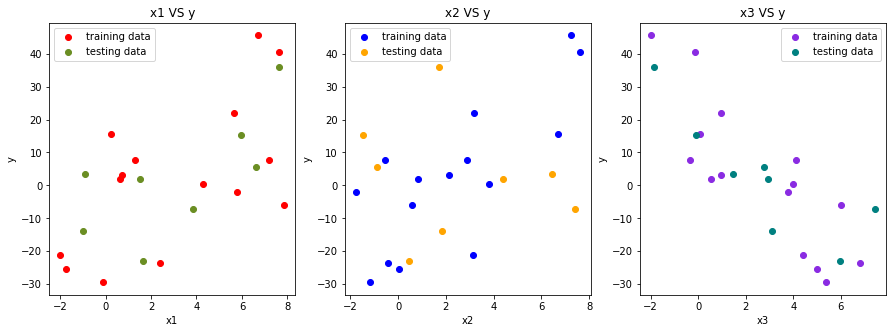

In [31]:
# Example hyper plane with some added randomness.
def hypPlane(X):
    return 3*X[:,0] + 2*X[:,1] - 5*X[:,2] + 1 + np.random.normal(0, 2, len(X))

np.random.seed(5)
# Training data
X_train2 = np.random.uniform(-2, 8, size=(15, 3))
y_train2 = hypPlane(X_train2)

# Testing data
X_test2 = np.random.uniform(-2, 8, size=(8, 3))
y_test2 = hypPlane(X_test2)

# Plot data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors=[['r', 'olivedrab'], ['b', 'orange'], ['blueviolet', 'teal']]

# Plot each feature in X VS the target y
for i in range(len(X_train2[0])):
    plt.subplot(1, 3, i+1)
    plt.title('x' + str(i+1) + ' VS y')
    plt.scatter(X_train2[:, i], y_train2, c=colors[i][0], label='training data')
    plt.scatter(X_test2[:, i], y_test2, c=colors[i][1], label='testing data')
    plt.legend()
    plt.ylabel('y')
    plt.xlabel('x' + str(i+1))

#### Fit a Linear Regression Model to the Training Data

Notice that this is done in exactly the same way as for 1D regression.

In [32]:
# Define at fit the multiple regression model
multreg = LinearRegression()
multreg.fit(X_train2, y_train2)

print('Regression Model:\n', multreg, "\n")
print('Model Parameters:\n', multreg.w)

Regression Model:
 y = 2.8592781562368437 + 2.943807572925704*x_1 + 1.8025687144405502*x_2 + -5.161280219189665*x_3 

Model Parameters:
 [ 2.85927816  2.94380757  1.80256871 -5.16128022]


#### Use the Fit Model to Make a Prediction on the Testing Data

In [33]:
# Now that the model has been fit, we can use it to make predictions on the testing data.
y_pred2 = multreg.predict(X_test2)

print('Actual Targets: ', np.round(y_test2, 2))
print('Predictions:', np.round(y_pred2, 2))

Actual Targets:  [ 15.43 -22.8    2.05  -7.12   3.43 -13.72  35.96   5.56]
Predictions: [ 18.31 -22.19   0.1  -10.9    4.32 -12.77  38.04   6.31]


#### Model Visualization

Because our data has 3 features and 1 targets, to plot the regression we would need to plot a 3D hyperplane in 4D space. Obviously, we can't plot something in 4D (At least not withought losing some information). However, one of the many things we can visualize is the distrobution of the residules of the model.

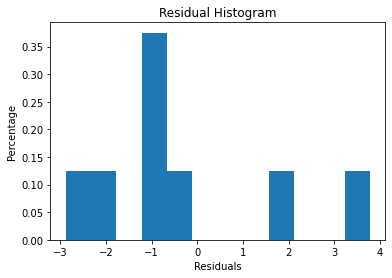

In [34]:
plt.hist((y_test2-y_pred2), bins=12, weights=np.ones(len(y_test2))/len(y_test2))
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Percentage')
plt.show()

#### Metrics
It is important to measure the performance of our model. There are many regression metrics one can use, but we will just look at some of the most popular ones. We want to use the testing data to measure the performance of the model. Here $y$ represents `y_test2` and $\hat{y}$ represents `y_pred2` which is the models predictions on `X_test2`.


1. Mean Absolute Error (MAE): The MAE tells us the distance, on average, each point is from the line vertically. The closer MAE is to zero the better the model fits the data.
$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

2. Mean Squared Error (MSE): The MSE tells us what the mean squared distance that each point is from the line. Squaring the error makes MSE much more sensative to outliers than MAE. The closer MSE is to zero the better the model fits the data.
$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

3. Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is also sensitive to outliers. RMSD is an aggragate of magnitued of the distance of each point from the line vertically. The closer RMSE is to zero the better the model fits the data.
$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

4. Coefficent of Determination ($r^2$ value): Proportion of the variation in the data that is explained by the model and is a measure of 'goodness of fit'. It is in $0\leq r^2\leq 1$ where $r^2=0$ indicates the model explains none of the variation in the data and $r^2=1$ indicates the model perfectly explains the variation in the data. So the closer $r^2$ is to 1 the better the model fits the data.
$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)}$$

In [35]:
# Note, the way we calculated the r value before will not work when the data has multiple features.
# So, for simplicity we only calculate the r-squared value. However, we can easily calculate |r|.

# All of the metrics are computed on the testing dataset.
mae_ = mae(y_test2, y_pred2)
mse_ = mse(y_test2, y_pred2)
rmse_ = rmse(y_test2, y_pred2)
r2_ = r2(y_test2, y_pred2)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)
print('|r|: %.3f' % np.sqrt(r2_))

from sklearn.metrics import r2_score

Mean Absolute Error: 1.739
Mean Squared Error: 4.174
Root Mean Squares Error: 2.043
r2: 0.985
|r|: 0.993



---

## 4. Polynomial Regression

---

Polynomials are not linear functions, so what is polynomial regression doing in a notebook all about linear regression? When we say "linear regression" we mean that the model is linear in terms of the model parameters/weights and <b>NOT</b> necisarly in terms of the features.

With this in mind, a polynomial model for a dataset with one feature looks like $y = w_0 + w_1x + w_2x^2 + w_3x^3 + \cdots + w_nx^n$. Note that this is actualy linear in terms of the model parameters $w_i$ since we know the value of $x$.

Further notice that the polynomial model is really just a special case of the multiple regression model $y = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + \cdots + w_nx_n$ where $x_i = x^i$. So, polynomial regression is just a special case of multiple linear regression and has a very similar derivation!

For polynomial regression we aim to find the $w_j$ values for $\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_kx^k$ such that the sum of square errors is minimized. To do this, we find the derivatives of the $SSE$ function and set them to zero.
    
\begin{equation}
    \hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_kx^k
\end{equation}

\begin{equation}
    \begin{split}
        SSE(w_0, \cdots, w_k) &= \sum_{i=1}^{m}(y_i-\hat{y}_i)^2 \\
        &= \sum_{i=1}^{m}(y_i-(w_0 + w_1x_i + \cdots + w_kx_i^k))^2
    \end{split}
\end{equation}

\begin{equation}
    \cfrac{\partial \, SSE(w_0, \cdots, w_k)}{\partial \, w_j} = 2 \sum_{i=1}^{m}(y_i-(w_0 + w_1x_i + \cdots + w_kx_i^k))\cdot x_i^j \ \text{ for } \ 0\leq j \leq k.
\end{equation}
Now that we have all of the partial derivatives, we can set them to zero and solve the system of linear equations. This system can be rewritten in terms of matrices for more compact notation and efficient computations.

\begin{equation}
    \text{Let } X = 
\begin{bmatrix}
    1 & x_{1} & x_{1}^2 & \cdots & x_{1}^k \\
    1 & x_{2} & x_{2}^2 & \cdots & x_{2}^k \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m} & x_{m}^2 & \cdots & x_{m}^k
\end{bmatrix}, \ \
y = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_m
\end{bmatrix}\text{, and }
\boldsymbol{w} = 
\begin{bmatrix}
    w_0 \\
   w_1 \\
    \vdots \\
    w_k
\end{bmatrix}
\end{equation}

Note, a matrix with the form of $X$ is called a Vandermonde matrix.

Then system of equations are then represented by $X^TX\boldsymbol{w} = X^Ty$.
This linear system can now be solved for $\boldsymbol{w}$.

#### Generate Dataset

Once again, we will make up a simple dataset to use.

[]

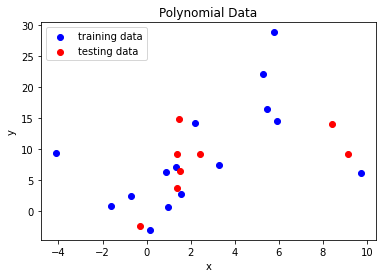

In [36]:
# An example polynomial with some added randomness.
def poly(x):
    return -0.1*x**3 + 0.8*x**2 + 2*x + 1 + np.random.normal(0, 4, len(x))

np.random.seed(123)
X_train3 = np.random.uniform(-5, 10, 15)
y_train3 = poly(X_train3)

X_test3 = np.random.uniform(-5, 10, 8)
y_test3 = poly(X_test3)

plt.scatter(X_train3, y_train3, label='training data', c='b')
plt.scatter(X_test3, y_test3, label='testing data', c='r')
plt.title('Polynomial Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot()

#### Fit a Polynomial Regression Model to the Training Data

This is similar to multiple linear regression but we will need to generate the powers of each feature first (i.e. the Vandermonde matrix).



In [37]:
# This function will generate the Vandermonde matrix needed for polynomial regression (minus the leftmost column of ones)
# which is added by the LinearRegression model. This fucntion only works with data that has a single feature.
def poly_features(x, deg):
    X = np.zeros((len(x), deg))
    
    for i in range(deg):
        X[:, i] = x**(i+1)
    
    return X

# Define and fit the polynomial regression model.
degree = 3 # Degree of the polynomial
polyreg = LinearRegression(poly=True)
polyreg.fit(poly_features(X_train3, degree), y_train3)

print('Regression Model:\n', polyreg, "\n")
print('Model Parameters:\n', polyreg.w)

Regression Model:
 y = 0.9198011170674134 + 2.275443663474684*x^1 + 0.7097767942072802*x^2 + -0.09122749044616761*x^3 

Model Parameters:
 [ 0.91980112  2.27544366  0.70977679 -0.09122749]


#### Use the Fit Model to Make a Prediction on the Testing Data

In [38]:
# Use the trained model to make predictions on the testing dataset.
y_pred3 = polyreg.predict(poly_features(X_test3, degree))

print('Actual Targets: ', np.round(y_test3, 2))
print('Predictions:', np.round(y_pred3, 2))

Actual Targets:  [ 6.44 14.77  9.19  3.67 -2.45  9.23 14.01  9.11]
Predictions: [ 5.64  5.48  9.23  5.2   0.27  5.23 16.04 11.18]


#### Model Visualization

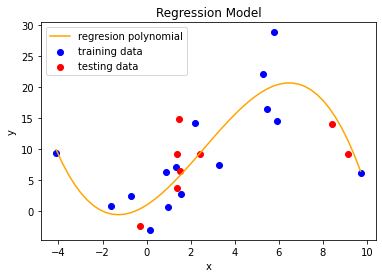

In [39]:
D = np.linspace(np.min(X_train3), np.max(X_train3), 50)
R = polyreg.predict(poly_features(D, degree))

plt.plot(D, R, label='regresion polynomial', c='orange')
plt.scatter(X_train3, y_train3, c='b', label='training data')
plt.scatter(X_test3, y_test3, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regression Model')
plt.show()

#### Metrics
It is important to measure the performance of our model. There are many regression metrics one can use, but we will just look at some of the most popular ones. We want to use the testing data to measure the performance of the model. Here $y$ represents `y_test3` and $\hat{y}$ represents `y_pred3` which is the models predictions on `X_test3`.


1. Mean Absolute Error (MAE): The MAE tells us the distance, on average, each point is from the line vertically. The closer MAE is to zero the better the model fits the data.
$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

2. Mean Squared Error (MSE): The MSE tells us what the mean squared distance that each point is from the line. Squaring the error makes MSE much more sensative to outliers than MAE. The closer MSE is to zero the better the model fits the data.
$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

3. Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is also sensitive to outliers. RMSD is an aggragate of magnitued of the distance of each point from the line vertically. The closer RMSE is to zero the better the model fits the data.
$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

4. Coefficent of Determination ($r^2$ value): Proportion of the variation in the data that is explained by the model and is a measure of 'goodness of fit'. It is in $0\leq r^2\leq 1$ where $r^2=0$ indicates the model explains none of the variation in the data and $r^2=1$ indicates the model perfectly explains the variation in the data. So the closer $r^2$ is to 1 the better the model fits the data.
$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)}$$

5. Corelation Coefficent (r value): The r value mesures the corelation between the input features and the output targets. $|r| \leq 1$. If r is near 1, there is strong positive correlation. If r is near -1, there is strong negative correlation.
* $0.7 ＜ |r| \leq 1$ - strong correlation
* $0.4 ＜ |r| ＜ 0.7$ - moderate correlation
* $0.2 ＜ |r| ＜ 0.4$ - weak correlation
* $0 \leq |r| ＜ 0.2$ - no correlation
$$r = \frac{\sum (x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2(y-\bar{y})^2}$$

$$ |r| = \sqrt{r^2} $$

In [40]:
# All of the metrics are computed on the testing dataset.
mae_ = mae(y_test3, y_pred3)
mse_ = mse(y_test3, y_pred3)
rmse_ = rmse(y_test3, y_pred3)
r2_ = r2(y_test3, y_pred3)
r_ = r(X_test3, y_test3)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)
print('r: %.3f' % r_)

Mean Absolute Error: 2.812
Mean Squared Error: 15.145
Root Mean Squares Error: 3.892
r2: 0.451
r: 0.508


#### Ploting Confidence Intervals

In practice, we only have a sample of the "true" dataset to fit our model to. We want to use the trained model to make predictions on samples not seen during the fitting stage. This is why we use a testing dataset. We want to see how the model performes on data it has not seen before (i.e. samples it was not trained with). As such, we would like to know the range that the "true" regression line lies within with some level of confidence. For this, we will construct an interval of 95% confidence for each learned parameter, $w_i$, of the model.

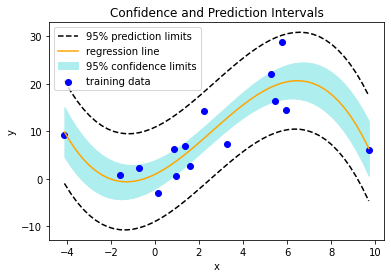

In [41]:
domain = np.linspace(np.min(X_train3), np.max(X_train3)) 
range_ = polyreg.predict(poly_features(domain, degree))

residules = y_train3-polyreg.predict(poly_features(X_train3, degree))

degfredom = len(X_train3)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical t-value from Student's t-distribution inverse cdf.

pred_int = t_crit*s_err*np.sqrt(1 + 1/len(X_train3) + 
                                (domain - np.mean(X_train3))**2 / np.sum((X_train3 - np.mean(X_train3))**2))
conf_int = t_crit*s_err*np.sqrt(1/len(X_train3) + 
                                (domain - np.mean(X_train3))**2 / np.sum((X_train3 - np.mean(X_train3))**2))


# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train3, y_train3, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()

---

## 5. Other Linear Regression Modles

---

Similary to how we generated polynomial features to fit a polynomial using linear regression, there are many other features we could generate to fit other types of functions. 

>As an example, we can compute an exponential regression model in a similary way. Consider the following exponential formula,
$$ y=w_0e^{w_1x} .$$
We will take the natural logarithm of both sides.
\begin{align}
  ln(y) &= ln(w_0e^{w_1x}) \\
  &= ln(w_0) + ln(e^{w_1x}) \\
  &= ln(w_0) + w_1x .
\end{align}
Let $y'=ln(y)$ and $w_0'=ln(w_0)$. Then we have the following linear model,
$$ y'=w_0'+w_1x. $$
Now we can solve for $w_0'$ and $w_1$ as normal and set $w_0=e^{w_0'}$.

Can you implement this yourself?

---

## 6. Conclusion and Takeaways

---

Now that we have finished implimenting our own linear regression model using numpy there are some important things to take away.

1. Ordinary Least Squares regression comes down to minimizing the sum of square errors function (SSE).
$$SSE(y, \hat{y}) = \sum(y_i-\hat{y_i})^2 $$

2. Split data into disjoint training and testing datasets. That way we can verify the accuracy of our model with data that the model was not trained with.

3. Fiting a polynomial or an exponential function is actual linear regression in disguise. Eventhough polynomials and exponentials are not linear functions, we can write them in a way so that they are linear in terms of the model parameters (i.e. the coeficients we solve for when minimizing SSE).